#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Read the data
df=pd.read_csv('/content/Fraud.csv')
# Shape the data
df.shape

(1307258, 11)

In [ ]:
df.head(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1,CASH_IN,160347.32,C1972143064,7965270.68,8125617.99,C33524623,724867.22,1517262.16,0.0,0.0
496,1,CASH_IN,289272.75,C312168418,8125617.99,8414890.75,C75457651,413976.60,31469.78,0.0,0.0
497,1,CASH_IN,63189.26,C95369743,8414890.75,8478080.00,C1860513229,101925.00,0.00,0.0,0.0
498,1,CASH_IN,196725.32,C26928827,8478080.00,8674805.32,C451111351,2248012.90,3940085.21,0.0,0.0


In [ ]:
df.tail(500)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1306758,136,PAYMENT,33260.82,C37950558,0.0,0.00,M579095392,0.00,0.00,0.0,0.0
1306759,136,PAYMENT,799.91,C1833171129,0.0,0.00,M626733298,0.00,0.00,0.0,0.0
1306760,136,PAYMENT,9889.69,C1067459043,0.0,0.00,M1073717820,0.00,0.00,0.0,0.0
1306761,136,PAYMENT,20902.80,C1300960074,0.0,0.00,M824932009,0.00,0.00,0.0,0.0
1306762,136,PAYMENT,17399.07,C255522390,0.0,0.00,M1293310927,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1307253,136,TRANSFER,426455.18,C379739604,0.0,0.00,C2142703715,705902.24,1132357.42,0.0,0.0
1307254,136,TRANSFER,464803.33,C1631993596,0.0,0.00,C1171040194,1011116.65,1475919.98,0.0,0.0
1307255,136,PAYMENT,15614.51,C1056703656,20063.0,4448.49,M915607287,0.00,0.00,0.0,0.0
1307256,136,PAYMENT,9973.69,C844867852,2693.0,0.00,M1648017509,0.00,0.00,0.0,0.0


#Data Cleaning

In [ ]:
df.isnull().values.any()

True

In [ ]:
df_dp = df.dropna()
print("\nDataFrame after removing rows with missing values:")
print(df_dp)


DataFrame after removing rows with missing values:
         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815       170136.0   
1           1   PAYMENT    1864.28  C1666544295        21249.0   
2           1  TRANSFER     181.00  C1305486145          181.0   
3           1  CASH_OUT     181.00   C840083671          181.0   
4           1   PAYMENT   11668.14  C2048537720        41554.0   
...       ...       ...        ...          ...            ...   
1307252   136  TRANSFER  163065.70   C758430314            0.0   
1307253   136  TRANSFER  426455.18   C379739604            0.0   
1307254   136  TRANSFER  464803.33  C1631993596            0.0   
1307255   136   PAYMENT   15614.51  C1056703656        20063.0   
1307256   136   PAYMENT    9973.69   C844867852         2693.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00      

In [ ]:
# Getting information about data
df_dp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307257 entries, 0 to 1307256
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1307257 non-null  int64  
 1   type            1307257 non-null  object 
 2   amount          1307257 non-null  float64
 3   nameOrig        1307257 non-null  object 
 4   oldbalanceOrg   1307257 non-null  float64
 5   newbalanceOrig  1307257 non-null  float64
 6   nameDest        1307257 non-null  object 
 7   oldbalanceDest  1307257 non-null  float64
 8   newbalanceDest  1307257 non-null  float64
 9   isFraud         1307257 non-null  float64
 10  isFlaggedFraud  1307257 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 119.7+ MB


In [ ]:
# Merchants
X = df_dp[df_dp['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


#Analysis of Data

In [ ]:
# Calculate the number of legitimate transactions
num_legit_transactions = len(df_filled[df_filled.isFraud == 0])

# Calculate the number of fraudulent transactions
num_fraud_transactions = len(df_filled[df_filled.isFraud == 1])

# Calculate the percentage of legitimate transactions
percentage_legit = (num_legit_transactions / (num_legit_transactions + num_fraud_transactions)) * 100

# Calculate the percentage of fraudulent transactions
percentage_fraud = (num_fraud_transactions / (num_legit_transactions + num_fraud_transactions)) * 100

# Print the results
print(f"Total number of legitimate transactions: {num_legit_transactions}")
print(f"Total number of fraudulent transactions: {num_fraud_transactions}")
print(f"Proportion of legitimate transactions: {percentage_legit:.4f}%")
print(f"Proportion of fraudulent transactions: {percentage_fraud:.4f}%")


Total number of legitimate transactions: 83449
Total number of fraudulent transactions: 112
Proportion of legitimate transactions: 99.8660%
Proportion of fraudulent transactions: 0.1340%


#2. Describe your fraud detection model in elaboration.

The decision tree model used for fraud detection is a supervised learning algorithm that splits the dataset into subsets based on the value of input features.

These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. So Decision Tree is a  good method for unbalanced data.

#Visualization

#Correlation Matrix

<Axes: >

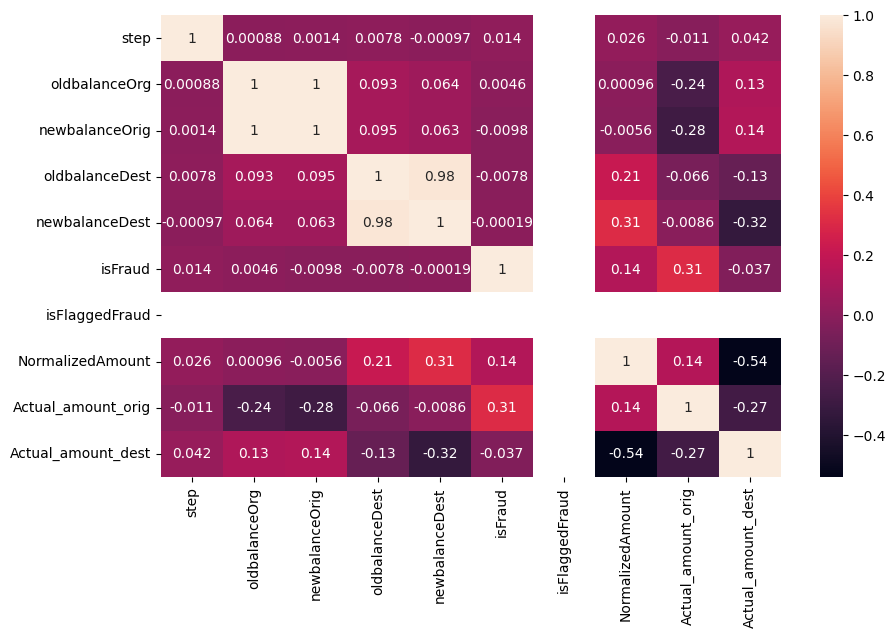

In [ ]:
corr=n_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#3. How did you select variables to be included in the model?

 The process of selecting variables involved identifying pairs of highly correlating features by analyzing VIF values and examining a correlation heatmap, then dropping one that was less related to the isFraud attribute for those remaining features which contributed uniquely to the model’s predictive power.

#Bar Chart

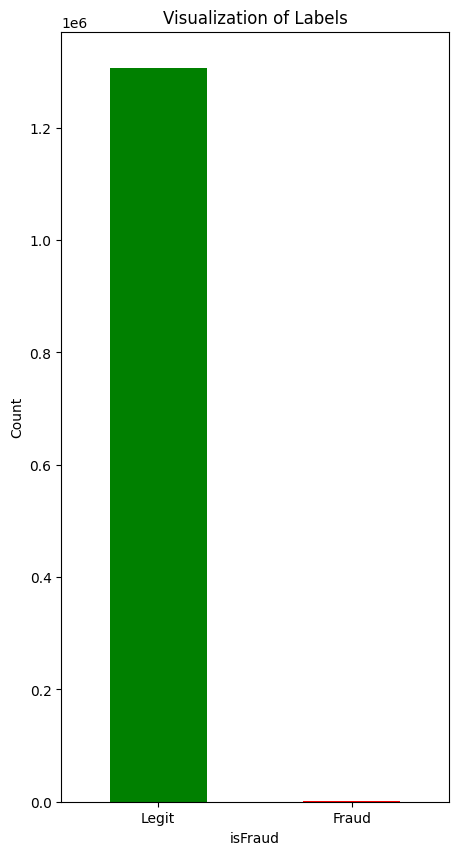

In [ ]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = n_df.value_counts(n_df['isFraud'], sort= True)
colors = ['green', 'red']
count_classes.plot(kind='bar', color=colors, rot=0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


#Pie Chart

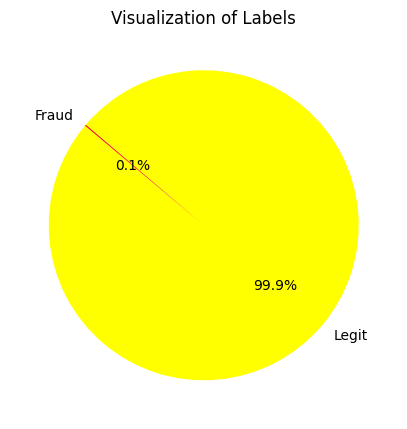

In [ ]:
count_classes = n_df['isFraud'].value_counts()
plt.figure(figsize=(5, 10))
labels = ["Legit", "Fraud"]
colors = ['yellow', 'red']
count_classes.plot(kind='pie', labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Visualization of Labels")
plt.ylabel("")
plt.show()

In [ ]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


#Label Encoding

In [ ]:
# Checking how many attributes are dtype: object
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307258 entries, 0 to 1307257
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1307258 non-null  int64  
 1   type            1307258 non-null  int64  
 2   amount          1307257 non-null  float64
 3   nameOrig        1307258 non-null  int64  
 4   oldbalanceOrg   1307257 non-null  float64
 5   newbalanceOrig  1307257 non-null  float64
 6   nameDest        1307258 non-null  int64  
 7   oldbalanceDest  1307257 non-null  float64
 8   newbalanceDest  1307257 non-null  float64
 9   isFraud         1307257 non-null  float64
 10  isFlaggedFraud  1307257 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 109.7 MB
None


In [ ]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,155978,170136.0,160296.36,342245,0.0,0.0,0.0,0.0
1,1,3,1864.28,450510,21249.0,19384.72,356936,0.0,0.0,0.0,0.0
2,1,4,181.00,205989,181.0,0.00,92155,0.0,0.0,1.0,0.0
3,1,1,181.00,1198954,181.0,0.00,82045,21182.0,0.0,1.0,0.0
4,1,3,11668.14,708465,41554.0,29885.86,172525,0.0,0.0,0.0,0.0


#Multi - Collinearity

In [ ]:
def calc_vif(df):
    # Replace infinite values with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return vif

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,step,1.904124
1,type,4.915144
2,amount,2.199223
3,nameOrig,2.614448
4,oldbalanceOrg,678.612331
5,newbalanceOrig,685.511074
6,nameDest,3.811012
7,oldbalanceDest,44.239265
8,newbalanceDest,47.599253
9,isFraud,1.150271


In [ ]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)
calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,type,2.755580
1,amount,1.815904
2,isFraud,1.144122
3,isFlaggedFraud,NaN
4,Actual_amount_orig,1.305574
5,Actual_amount_dest,1.642031
6,TransactionPath,2.718163


<Axes: >

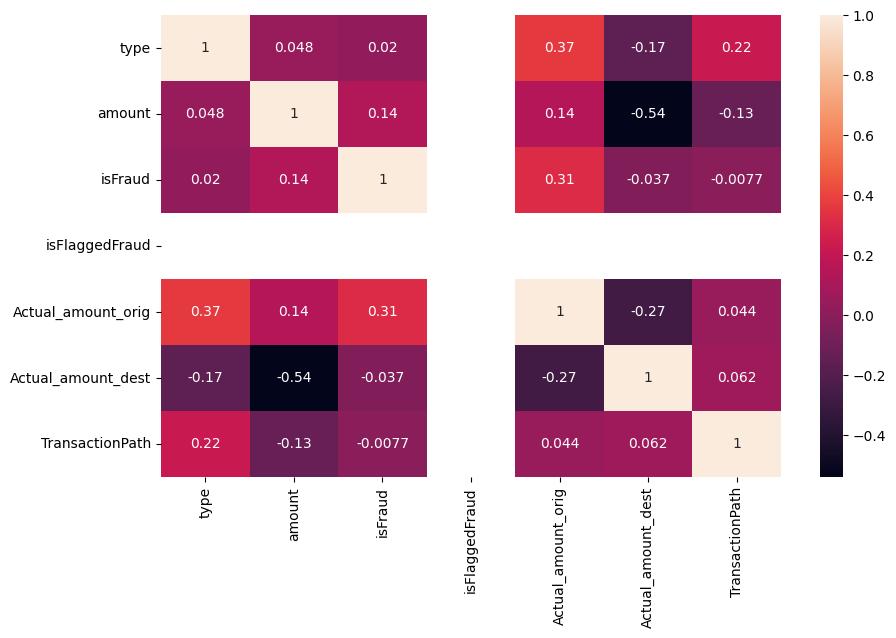

In [ ]:
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

#Model Training

In [ ]:
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

#Splitting of Data

In [ ]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (915079, 6)
Shape of X_test:  (392178, 6)


#Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
#Accuracy
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.90769497524083


In [ ]:
print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 298
False Positives: 189
True Negatives: 391518
False Negatives: 173


In [ ]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[391518    189]
 [   173    298]]


#Classification Report

In [ ]:
classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    391707
         1.0       0.61      0.63      0.62       471

    accuracy                           1.00    392178
   macro avg       0.81      0.82      0.81    392178
weighted avg       1.00      1.00      1.00    392178



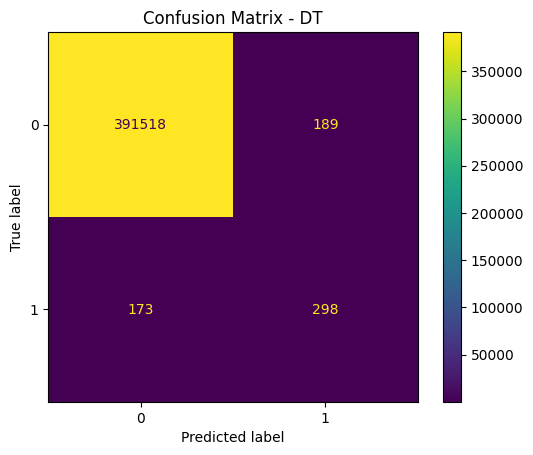

In [ ]:
# visualising confusion matrix - DT
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# AUC ROC - DT

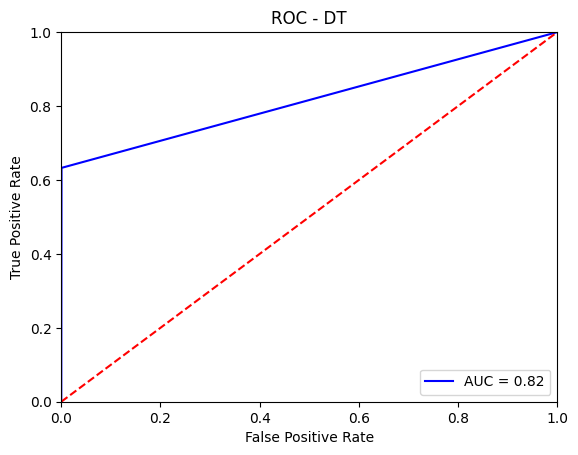

In [ ]:

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Conclusion

Preciseness is needed in fraud detection models as it focuses on correctly identifying fraud while minimizing false positives. This will ensure those who are not guilty do not get recognized wrongly. Decision Tree is good at handling datasets that have a skewed class distribution (e.g, Legit: Fraud :: 99.87:0.13). Because of their ability to generate intuitive decision rules, they are the best when it comes to identifying even subtle fraud patterns efficiently.

#5. What are the key factors that predict fraudulent customer?

1. **Unusual Behavioral Patterns:** Behavior that deviates from normal behavior, such as experiencing unusually high numbers or high frequencies over a short period of time.

2. **Geographic anomalies:** Identifying behavior from unusual or unexpected geographical locations relative to a consumer’s usual behavior.

3. **Behavioral Analysis:** Analyze patterns of customer behavior and transaction history to identify abnormalities or suspicious activities.

#6. Do these factors make sense? If yes, How? If not, How not?

Yes it makes sense in the following ways :-
*   Utilize only demonstrated and steady applications.
Ensure all net surfing occurs on secured websites.

*   Maintain secure net connections, which include using VPNs (Virtual Private Networks).
*   Regularly replace safety protocols on all gadgets, which include laptops and cellular telephones.
*   Promptly report any suspicions of security breaches or fraudulent activities to the appropriate government or the enterprise's protection crew.
*   Exercise warning and refrain from responding to unsolicited communications, whether calls, SMS, or emails.
  




#7. What kind of prevention should be adopted while company update its infrastructure?

1. **Backup Data:** Ensure that the critical data is backed up correctly before updating.

2. **Testing in staging environment:** First thoroughly test the update in staging environment.

3. **Implement Change Management:** Use standardized processes to authorize and track updates.

4. **Monitor system health:** Constantly monitor performance during and after upgrades.

5. **Apply security patches:** Update software and systems with the latest patches.

6. **Ensure redundancy:** Have backup power and redundancy to minimize interruptions.


#8. Assuming these actions have been implemented, how would you determine if they work?

1. Monitor performance metrics such as uptime and response time.
2. See incident reports for system status and security.
3. Collect user feedback on the reliability and usability of the system.
4. Conduct regular safety audits and compliance reviews.